<a href="https://colab.research.google.com/github/ShamsulAbedin/CA684I/blob/master/Shamsul_MediaEval_Prediction_with_C3D_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install PyPrind


In [2]:
!pip uninstall tensorflow==1.13.2
#!pip install tensorflow==1.13rc0

Uninstalling tensorflow-1.13.0rc0:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.13.0rc0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.13.0rc0


In [0]:

import pandas as pd
from keras import Sequential
from keras import layers
from keras import regularizers
import numpy as np
from string import punctuation
import pyprind
from collections import Counter
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import preprocessing
import os




In [0]:

# for reproducability
from numpy.random import seed
seed(1)
import tensorflow
from tensorflow import set_random_seed
tensorflow.random.set_random_seed(1)

In [0]:
def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

def vname2ID(vnames):
    """Parse video digital id from its name
    vnames: a list contains file names"""
    vid = [ os.path.splitext(vn)[0]+'.webm' for vn in vnames]
    return vid

def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

In [15]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/CA684_Assignment/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# load the ground truth values
label_path = '/content/drive/My Drive/CA684_Assignment/Dev-set/Ground-truth/'
labels=pd.read_csv(label_path+'ground-truth.csv')

In [0]:
Feat_path = '/content/drive/My Drive/CA684_Assignment/Dev-set/'
# Load video related features first
# it helps with the organization of the video names
vid = labels.video.values

Features = pd.DataFrame({'video': vid,
                   'C3D': [read_C3D(Feat_path+'C3D'+'/'+os.path.splitext(item)[0]+'.txt') for item in vid],
                       })

In [0]:
X = np.stack(Features['C3D'].values)
Y = labels[['short-term_memorability','long-term_memorability']].values

#Y = Y[:,1]
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=42)

In [0]:

# Load testing data
test_path = '/content/drive/My Drive/CA684_Assignment/Dev-set/'
test_vid = os.listdir(test_path+'C3D')
Features_test = pd.DataFrame({'video': test_vid,
                   'C3D': [read_C3D(test_path+'C3D'+'/'+item) for item in test_vid],
                       })
X_test = np.stack(Features_test['C3D'].values)

IndexError: ignored

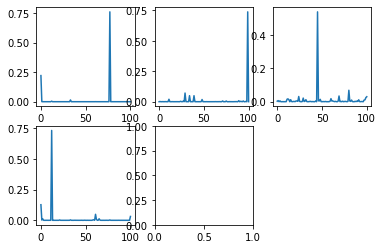

In [20]:
nrows,ncols = 2,3
N = nrows*ncols
ind = np.random.choice(8000,size=N)
for ii in range(N):
    plt.subplot(nrows,ncols,ii+1)
    plt.plot(X[ind[ii],:])
plt.show()

In [0]:
import keras.backend as K
K.set_floatx('float64')
import tensorflow as tf
import tensorflow.contrib.metrics as M
def spearmann_rank_coeff(y_true, y_pred):
    '''Spearmann rank correlation coefficient'''
    y_true_rank = y_true
    y_pred_rank = y_pred
    y_t_mean = tf.reduce_mean(y_true_rank,0)
    y_p_mean = tf.reduce_mean(y_pred_rank,0)
    x = tf.subtract(y_pred_rank,y_p_mean)
    y =tf.subtract(y_true_rank,y_t_mean)
    xcov = 1/tf.shape(x)[0] * tf.reduce_sum(x * y)
    #a = K.std(y_true_rank)*K.std(y_pred_rank)
    coef = tf.divide(xcov,K.std(y_true_rank)*K.std(y_pred_rank))
    return coef

def test_coeff(y_true,y_pred):
    return M.streaming_(y_true,y_pred)

In [20]:
pip uninstall tensorflow

In [21]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 90kB/s 
     |████████████████████████████████| 3.2MB 37.7MB/s 
     |████████████████████████████████| 491kB 32.0MB/s 
  Found existing installation: tensorboard 1.12.2
    Uninstalling tensorboard-1.12.2:
      Successfully uninstalled tensorboard-1.12.2
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0


In [1]:
import keras.backend as K
K.set_floatx('float64')
import tensorflow as tf
import tensorflow.contrib.metrics as M
def spearmann_rank_coeff(y_true, y_pred):
    '''Spearmann rank correlation coefficient'''
    y_true_rank = y_true
    y_pred_rank = y_pred
    y_t_mean = tf.reduce_mean(y_true_rank,0)
    y_p_mean = tf.reduce_mean(y_pred_rank,0)
    x = tf.subtract(y_pred_rank,y_p_mean)
    y =tf.subtract(y_true_rank,y_t_mean)
    xcov = 1/tf.shape(x)[0] * tf.reduce_sum(x * y)
    #a = K.std(y_true_rank)*K.std(y_pred_rank)
    coef = tf.divide(xcov,K.std(y_true_rank)*K.std(y_pred_rank))
    return coef

def test_coeff(y_true,y_pred):
    return M.streaming_(y_true,y_pred)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:

a=tf.constant([[3.1,4.5,2,7],[1,2,3,4]],dtype=tf.float64)
b=tf.constant([[3.5,6,2.9,9],[5,4,3,2]],dtype=tf.float64)

res=spearmann_rank_coeff(a,b)
#res=test_coeff(a,b)

In [23]:
with tf.Session() as sess:
    sess.run(res)
    print(res.eval())

1.5698467415620858


In [0]:
from keras import Sequential

In [24]:
model = Sequential()
model.add(layers.Dense(200,activation='relu',kernel_regularizer=None,input_shape=(X.shape[1],)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(200,activation='relu',kernel_regularizer=None))
model.add(layers.Dropout(0.1))
#model.add(layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               20400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 61,002
Trainable params: 61,002
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop',loss=['mae'],metrics=['acc',spearmann_rank_coeff])
history=model.fit(x=X_train,y=Y_train,batch_size=50,epochs=20,validation_split=0.2,shuffle=True,verbose=True)


Train on 3840 samples, validate on 960 samples
Epoch 1/20
3840/3840 [==============================] - 1s 170us/step - loss: 0.1051 - acc: 0.7031 - spearmann_rank_coeff: 0.0953 - val_loss: 0.0878 - val_acc: 0.6813 - val_spearmann_rank_coeff: 0.1076
Epoch 2/20
3840/3840 [==============================] - 0s 118us/step - loss: 0.0877 - acc: 0.7089 - spearmann_rank_coeff: 0.1915 - val_loss: 0.0866 - val_acc: 0.6813 - val_spearmann_rank_coeff: 0.1286
Epoch 3/20
3840/3840 [==============================] - 0s 125us/step - loss: 0.0876 - acc: 0.7089 - spearmann_rank_coeff: 0.2000 - val_loss: 0.0936 - val_acc: 0.6813 - val_spearmann_rank_coeff: 0.1112
Epoch 4/20
3840/3840 [==============================] - 0s 118us/step - loss: 0.0871 - acc: 0.7089 - spearmann_rank_coeff: 0.2250 - val_loss: 0.0878 - val_acc: 0.6813 - val_spearmann_rank_coeff: 0.1483
Epoch 5/20
3840/3840 [==============================] - 0s 119us/step - loss: 0.0869 - acc: 0.7081 - spearmann_rank_coeff: 0.2303 - val_loss: 0.

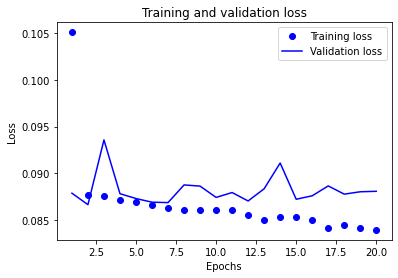

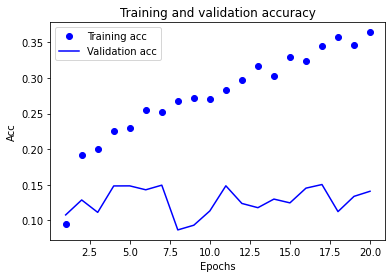

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['spearmann_rank_coeff']
val_acc = history.history['val_spearmann_rank_coeff']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

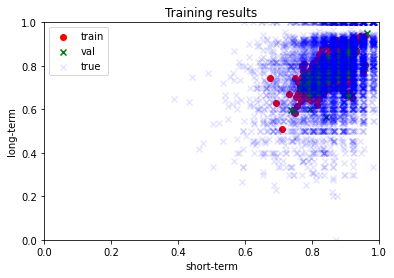

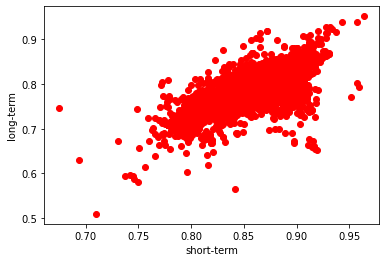

In [27]:
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)

if len(Y.shape) == 2:
    plt.figure()
    plt.scatter(Y_pred_train[:,0],Y_pred_train[:,1],marker='o',c='r',label='train')
    plt.scatter(Y_pred_val[:,0],Y_pred_val[:,1],marker='x',c='g',label='val')
    plt.scatter(Y[:,0],Y[:,1],marker='x',c='b',label='true',alpha=0.1)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.legend()
    plt.xlabel('short-term')
    plt.ylabel('long-term')
    plt.title('Training results')
    plt.show()
    
    # plot testing results
    Y_pred = model.predict(X_test[:,:],batch_size=32)
    plt.figure()
    plt.scatter(Y_pred[:,0],Y_pred[:,1],marker='o',c='r')
    plt.xlabel('short-term')
    plt.ylabel('long-term')
    plt.show()
    
else:
    plt.figure()
    plt.scatter(Y_pred_train,Y_train,marker='o',c='r',label='train')
    plt.scatter(Y_pred_val,Y_val,marker='x',c='g',label='val')
    #plt.scatter(Y[:,0],Y[:,1],marker='x',c='b',label='true',alpha=0.1)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.legend()
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.title('Training results [short-term]')
    plt.show()

In [0]:
Res = pd.DataFrame

In [0]:
Y_pred = model.predict(X_val)


In [0]:
Res_short = pd.DataFrame({'Y_true':Y_val[:,0],'Y_pred':np.squeeze(Y_pred[:,0])})


In [31]:
spearman_rank_correlation_coefficient = Res_short[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
score_short = round(spearman_rank_correlation_coefficient.iloc[1][0],3)
print('Short-Term Spearman\'s correlation: %.3f' % score_short)

Short-Term Spearman's correlation: 0.254


In [32]:
Res_long = pd.DataFrame({'Y_true':Y_val[:,1],'Y_pred':np.squeeze(Y_pred[:,1])})
spearman_rank_correlation_coefficient_long = Res_long[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
score_long = round(spearman_rank_correlation_coefficient_long.iloc[1][0],3)
print('Long-Term Spearman\'s correlation: %.3f' % score_long)

Long-Term Spearman's correlation: 0.112


In [33]:
Get_score(Y_pred,Y_val)


The Spearman's correlation coefficient is: 0.254
The Spearman's correlation coefficient is: 0.112
